<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           10000 non-null  int64  
 1   Work_From_Home                 10000 non-null  int64  
 2   Hours_Worked_Per_Day           10000 non-null  float64
 3   Meetings_Per_Day               10000 non-null  float64
 4   Productivity_Change            10000 non-null  int64  
 5   Stress_Level                   10000 non-null  object 
 6   Health_Issue                   10000 non-null  int64  
 7   Job_Security                   10000 non-null  int64  
 8   Childcare_Responsibilities     10000 non-null  int64  
 9   Commuting_Changes              10000 non-null  int64  
 10  Technology_Adaptation          10000 non-null  int64  
 11  Salary_Changes                 10000 non-null  int64  
 12  Team_Collaboration_Challenges  10000 non-null  

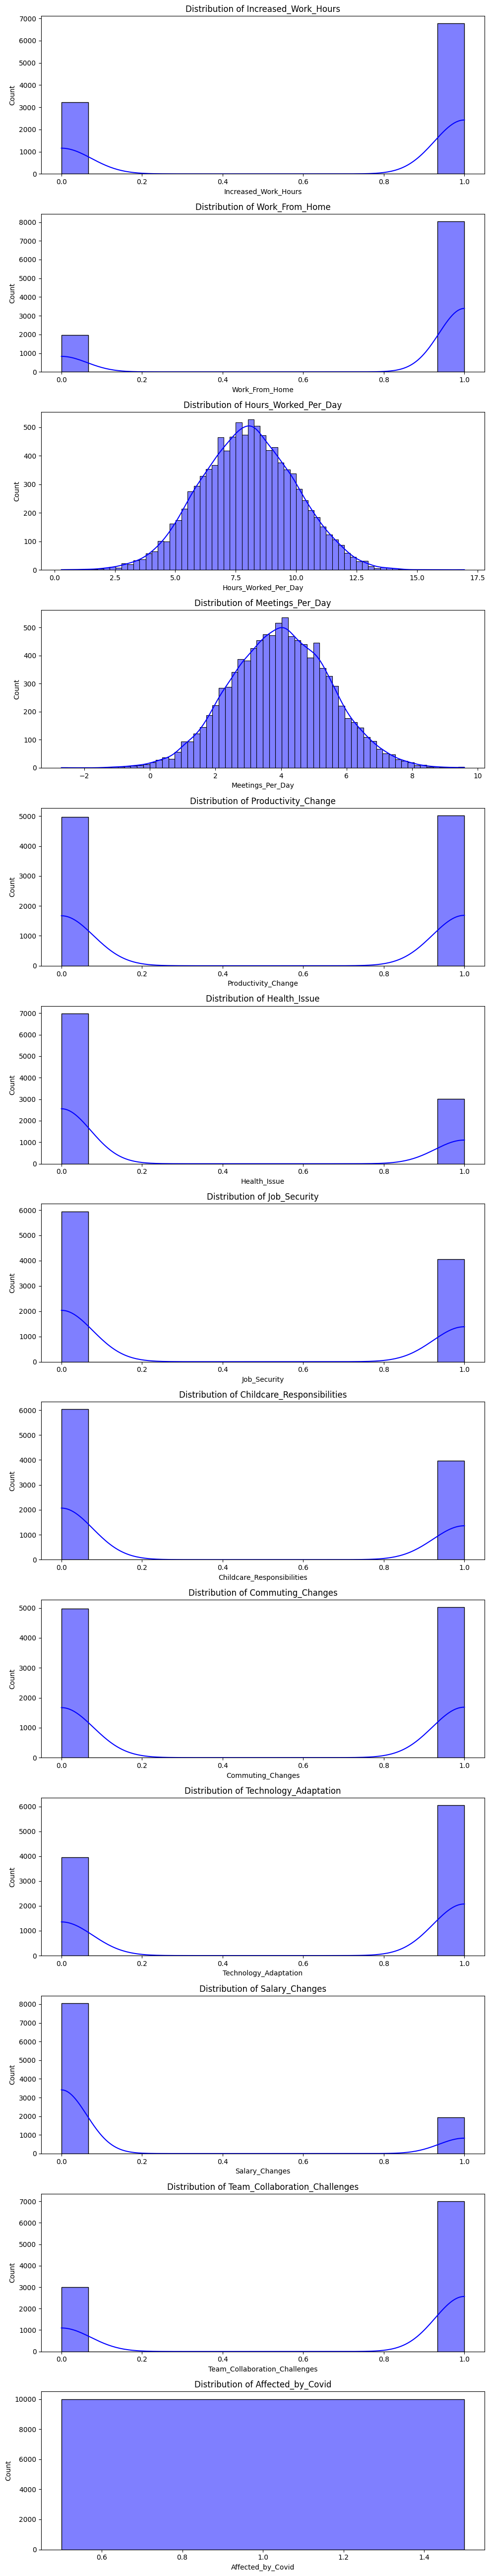


Insight: The skewness of Increased_Work_Hours is -0.76.
     Increased_Work_Hours seems relatively normal in distribution.

Insight: The skewness of Work_From_Home is -1.53.
     Work_From_Home has a negative skew (left-tailed distribution). Consider applying transformations.

Insight: The skewness of Hours_Worked_Per_Day is 0.01.
     Hours_Worked_Per_Day seems relatively normal in distribution.

Insight: The skewness of Meetings_Per_Day is 0.00.
     Meetings_Per_Day seems relatively normal in distribution.

Insight: The skewness of Productivity_Change is -0.01.
     Productivity_Change seems relatively normal in distribution.

Insight: The skewness of Health_Issue is 0.87.
     Health_Issue seems relatively normal in distribution.

Insight: The skewness of Job_Security is 0.39.
     Job_Security seems relatively normal in distribution.

Insight: The skewness of Childcare_Responsibilities is 0.42.
     Childcare_Responsibilities seems relatively normal in distribution.

Insight: The

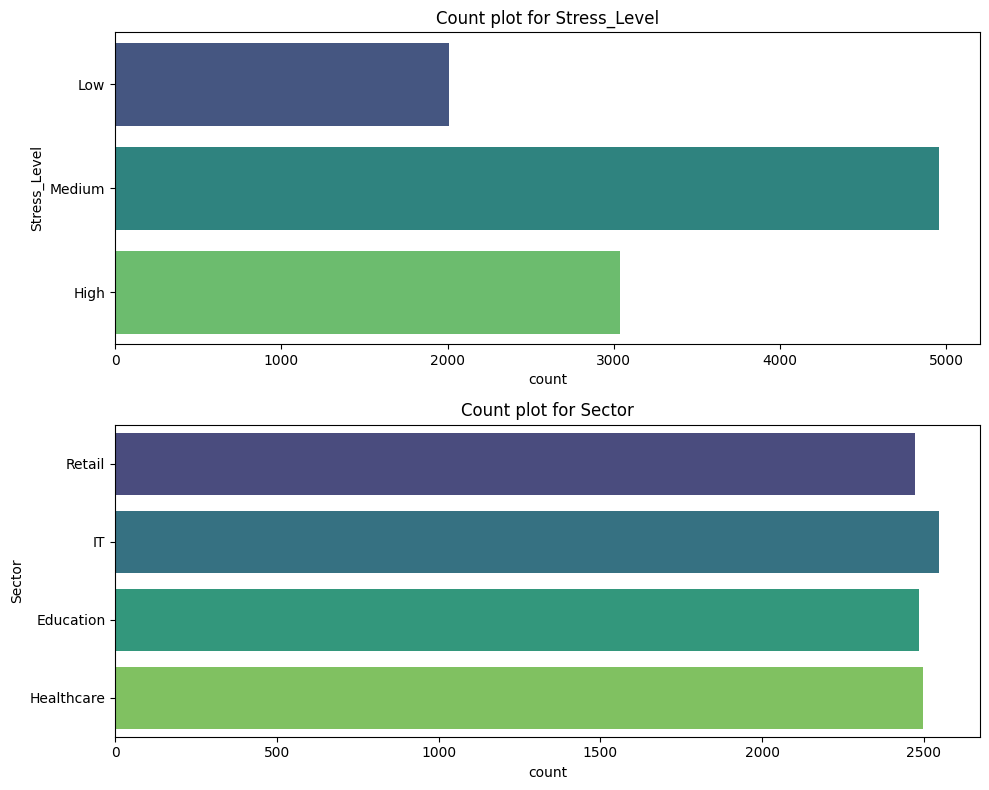


Insight: The dominant category in Stress_Level is 'Medium' with 4956 occurrences.

Insight: The dominant category in Sector is 'IT' with 2546 occurrences.


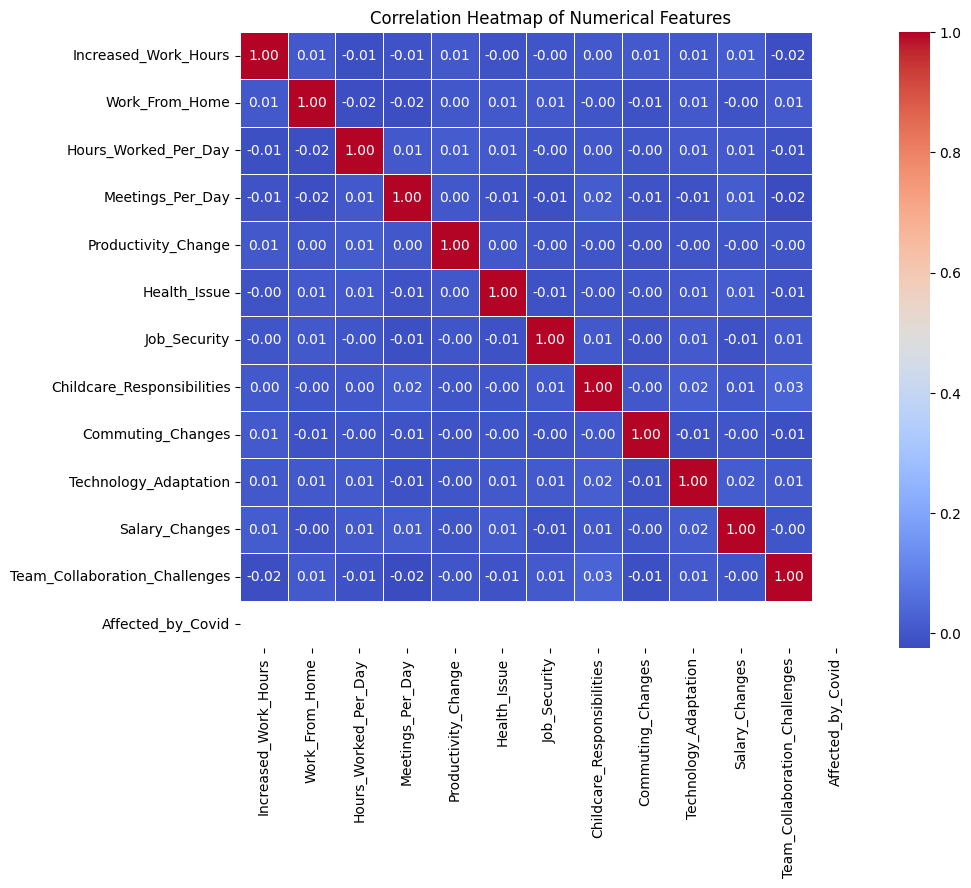


Insight: Strong correlations (greater than 0.8 or less than -0.8) between features:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('synthetic_covid_impact_on_work.csv')

# 1. Dataset Info
dataset_info = data.info()  # Identify data types (numerical or categorical) and potential issues like null values
print("Dataset Info:\n", dataset_info)

# 2. Summary Statistics
summary_stats = data.describe()  # Check data spread, detect potential outliers, and understand the distribution of numerical features.
print("Summary Stats:\n", summary_stats)

# 3. Missing Values
missing_values = data.isnull().sum()  # Check missing values to handle them later
print("Missing Values:\n", missing_values)

# Insights from Missing Values
if missing_values.any():
    print("\nInsight: The dataset contains missing values in the following columns:")
    print(missing_values[missing_values > 0])
else:
    print("\nInsight: No missing values found in the dataset.")

# 4. Distribution of Numerical Features
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, len(numerical_cols)*4))

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Insights from Numerical Features Distribution
for col in numerical_cols:
    skewness = data[col].skew()
    print(f"\nInsight: The skewness of {col} is {skewness:.2f}.")
    if skewness > 1:
        print(f"     {col} has a positive skew (right-tailed distribution). Consider applying transformations such as a log or square root.")
    elif skewness < -1:
        print(f"     {col} has a negative skew (left-tailed distribution). Consider applying transformations.")
    else:
        print(f"     {col} seems relatively normal in distribution.")

# 5. Distribution of Categorical Features
categorical_cols = data.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(10, len(categorical_cols)*4))

for i, col in enumerate(categorical_cols):
    sns.countplot(y=data[col], ax=axes[i], hue=data[col], palette='viridis', legend=False)
    axes[i].set_title(f'Count plot for {col}')
plt.tight_layout()
plt.show()

# Insights from Categorical Features
for col in categorical_cols:
    counts = data[col].value_counts()
    dominant_category = counts.idxmax()
    dominant_count = counts.max()
    print(f"\nInsight: The dominant category in {col} is '{dominant_category}' with {dominant_count} occurrences.")
    rare_categories = counts[counts < 0.05 * len(data)]
    if not rare_categories.empty:
        print(f"     Rare categories in {col}: {rare_categories.index.tolist()} (less than 5% of total observations).")

# 6. Correlation between Numerical Features
# Filter the dataset to only include numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Insight from Correlation
print("\nInsight: Strong correlations (greater than 0.8 or less than -0.8) between features:")
strong_correlations = correlation_matrix.abs() > 0.8
for row in strong_correlations.index:
    for col in strong_correlations.columns:
        if strong_correlations.loc[row, col] and row != col:
            print(f"     {row} and {col} have a strong correlation of {correlation_matrix.loc[row, col]:.2f}.")


In [5]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import pandas as pd

# Load the dataset
data = pd.read_csv('synthetic_covid_impact_on_work.csv')

# These strategies ensure missing data doesn't disrupt analysis or modeling while minimizing bias in imputation.
categorical_imputer = SimpleImputer(strategy='most_frequent')
numerical_imputer = SimpleImputer(strategy='median')

# Encoding is essential for machine learning models that require numerical input.
# Scaling ensures features contribute equally during training, especially for distance-based algorithms like SVMs or kNN.
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

scaler = StandardScaler()

# This distinction allows applying specific preprocessing steps tailored to each column type.
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Modular preprocessing pipelines make the workflow robust and reusable.
# Encoding before imputation for categorical data can improve compatibility.
preprocessor = ColumnTransformer(
    transformers=[
        ('num_impute', numerical_imputer, numerical_cols),  # Impute numerical columns
        ('cat', Pipeline([('encode', encoder), ('impute', categorical_imputer)]), categorical_cols),  # Impute then encode categorical columns
        ('scale', scaler, numerical_cols)  # Scale numerical columns
    ],
    remainder='passthrough'  # Any columns not specified will be passed through unmodified
)

# Fit the preprocessor on the data
preprocessor.fit(data)

# Transform the data using the fitted preprocessor
processed_data = preprocessor.transform(data)

# Get the names of the encoded categorical features
encoded_feature_names = preprocessor.named_transformers_['cat']['encode'].get_feature_names_out(categorical_cols)

# Ensure the columns are correctly labeled for processed data
processed_columns = list(numerical_cols) + list(encoded_feature_names) + list(numerical_cols)

# Create a DataFrame from the transformed data
processed_df = pd.DataFrame(processed_data, columns=processed_columns)

# Verify that preprocessing was applied correctly and confirm the dataset's readiness for downstream tasks
print(processed_df.head())

# ### Insights ###

# 1. Descriptive Statistics for Numerical Columns (after scaling and imputation)
print("\nDescriptive Statistics (Numerical Features):")
print(processed_df.describe())

# Insight: Discuss the transformed features (scaled features, imputed values).
# For example, after scaling, the mean should be approximately 0, and the standard deviation should be approximately 1.

# 2. Class Distribution for Categorical Features (Encoded Data)
print("\nClass Distribution for Categorical Features:")
# Since the categorical features have been one-hot encoded, we now need to analyze the encoded columns.
encoded_data = processed_df[encoded_feature_names]
for col in encoded_data.columns:
    print(f"\nInsight for {col}:")
    print(encoded_data[col].value_counts(normalize=True))

# Insight: If there are imbalanced categories, it may affect model performance. You may want to apply balancing techniques (e.g., oversampling, undersampling) during model training.

# 3. Correlation between Numerical Features (Scaled)
print("\nCorrelation Matrix (Numerical Features):")
numerical_data = processed_df[numerical_cols]  # Extract numerical data after scaling
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

# Insight: Strong correlations (greater than 0.8 or less than -0.8) between numerical features could suggest collinearity. Collinearity may need to be addressed during model training (e.g., by dropping one of the correlated features).

# 4. Final Insights
print("\nInsight Summary:")
print("- All numerical columns have been imputed with median values, and scaling has been applied to ensure they contribute equally in model training.")
print("- Categorical columns have been one-hot encoded and imputed with the most frequent category to handle missing values.")
print("- Check the correlation matrix to identify strong correlations between numerical features; strong correlations should be addressed if necessary to avoid multicollinearity.")
print("- Examine the class distribution for categorical features to understand if any class imbalances exist.")


   Increased_Work_Hours  Work_From_Home  Hours_Worked_Per_Day  \
0                   1.0             1.0              6.392394   
1                   1.0             1.0              9.171984   
2                   1.0             0.0             10.612561   
3                   1.0             1.0              5.546169   
4                   0.0             1.0             11.424615   

   Meetings_Per_Day  Productivity_Change  Health_Issue  Job_Security  \
0          2.684594                  1.0           0.0           0.0   
1          3.339225                  1.0           0.0           1.0   
2          2.218333                  0.0           0.0           0.0   
3          5.150566                  0.0           0.0           0.0   
4          3.121126                  1.0           0.0           1.0   

   Childcare_Responsibilities  Commuting_Changes  Technology_Adaptation  ...  \
0                         1.0                1.0                    1.0  ...   
1               

Mean Squared Error: 3.8096941108075595
Root Mean Squared Error: 1.9518437721312532
R-squared: -0.0021639029664590748


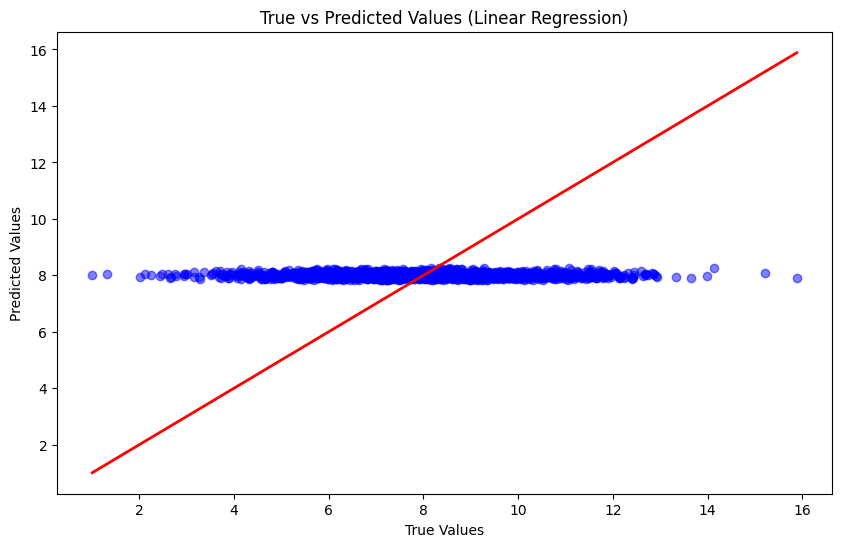

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming your dataset is loaded in 'data'
# Example: Replace with your actual dataset

# Identify and encode categorical columns (e.g., 'Gender', 'Productivity_Change', etc.)
categorical_cols = data.select_dtypes(include=['object']).columns

# Using LabelEncoder to convert categorical columns into numeric format
label_encoder = LabelEncoder()

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop(['Hours_Worked_Per_Day'], axis=1)  # Features
y = data['Hours_Worked_Per_Day']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = regressor.predict(X_test)

# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Plotting True vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Line of perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Linear Regression)')
plt.show()


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('synthetic_covid_impact_on_work.csv')

# Check columns and dataset info
print(data.columns)
print(data.info())

# Define the target column
target_column = 'Increased_Work_Hours'

# Ensure the target column exists
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset")

# Data Preprocessing
processed_df = data.dropna()  # Drop rows with missing values
X = processed_df.drop(columns=[target_column])
y = processed_df[target_column]

# Check for categorical columns to one-hot encode
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Categorical columns to encode: {categorical_cols}")

# Encode categorical variables (if any) and scale features
X = pd.get_dummies(X, drop_first=True)

# Check data after encoding
print(X.head())

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Polynomial Regression (Degree 2)": Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('linear_regression', LinearRegression())
    ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "R2": r2}

# Display results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"  Root Mean Squared Error: {metrics['RMSE']:.4f}")
    print(f"  R-squared: {metrics['R2']:.4f}")
    print("-" * 40)


Index(['Increased_Work_Hours', 'Work_From_Home', 'Hours_Worked_Per_Day',
       'Meetings_Per_Day', 'Productivity_Change', 'Stress_Level',
       'Health_Issue', 'Job_Security', 'Childcare_Responsibilities',
       'Commuting_Changes', 'Technology_Adaptation', 'Salary_Changes',
       'Team_Collaboration_Challenges', 'Sector', 'Affected_by_Covid'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           10000 non-null  int64  
 1   Work_From_Home                 10000 non-null  int64  
 2   Hours_Worked_Per_Day           10000 non-null  float64
 3   Meetings_Per_Day               10000 non-null  float64
 4   Productivity_Change            10000 non-null  int64  
 5   Stress_Level                   10000 non-null  object 
 6   Health_Issue                   100

Index(['Increased_Work_Hours', 'Work_From_Home', 'Hours_Worked_Per_Day',
       'Meetings_Per_Day', 'Productivity_Change', 'Stress_Level',
       'Health_Issue', 'Job_Security', 'Childcare_Responsibilities',
       'Commuting_Changes', 'Technology_Adaptation', 'Salary_Changes',
       'Team_Collaboration_Challenges', 'Sector', 'Affected_by_Covid'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Increased_Work_Hours           10000 non-null  int64  
 1   Work_From_Home                 10000 non-null  int64  
 2   Hours_Worked_Per_Day           10000 non-null  float64
 3   Meetings_Per_Day               10000 non-null  float64
 4   Productivity_Change            10000 non-null  int64  
 5   Stress_Level                   10000 non-null  object 
 6   Health_Issue                   100

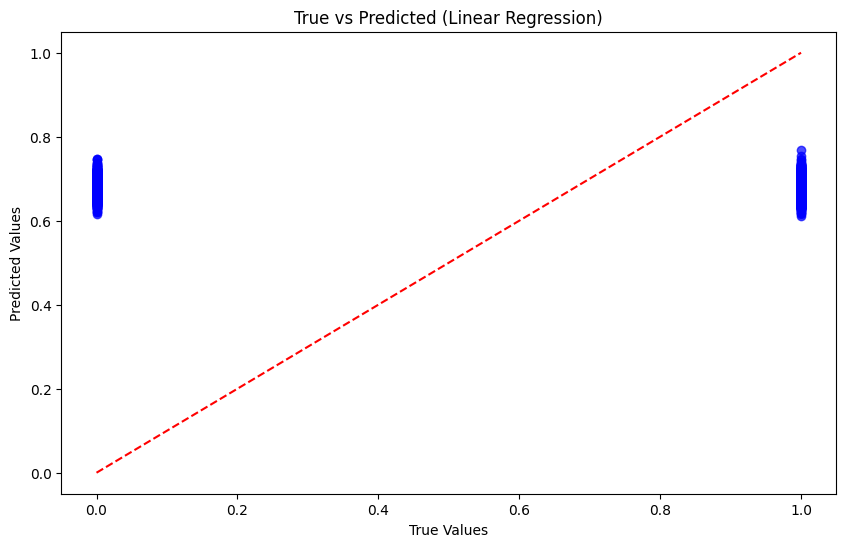

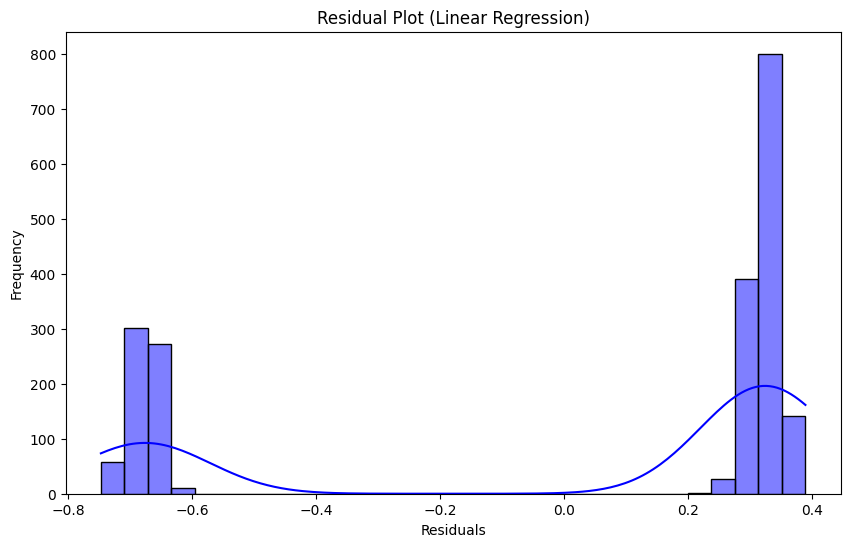

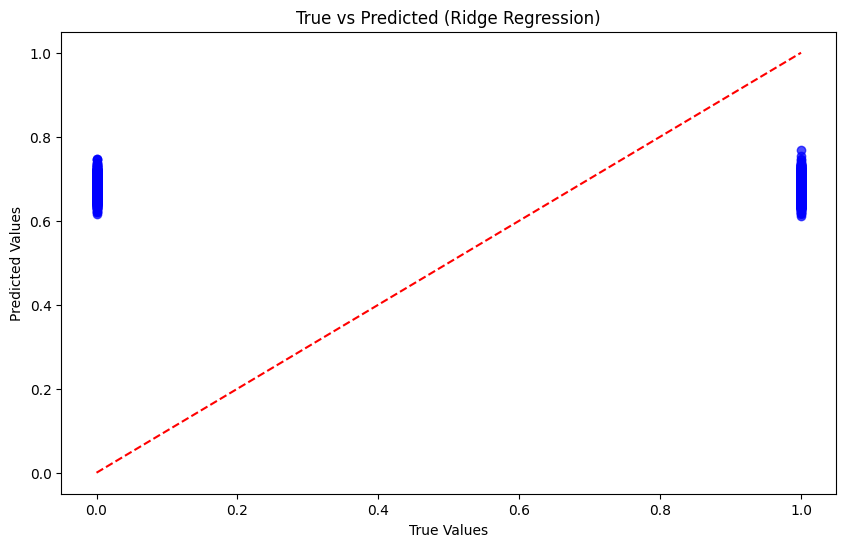

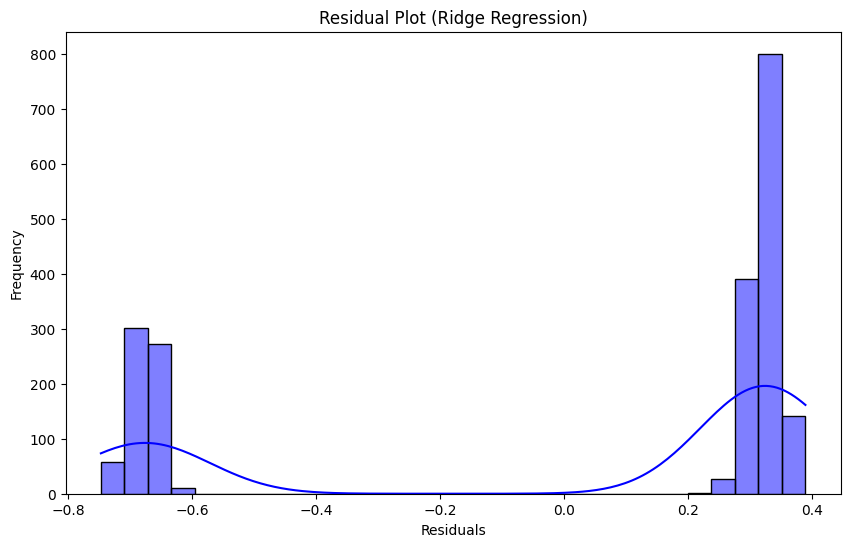

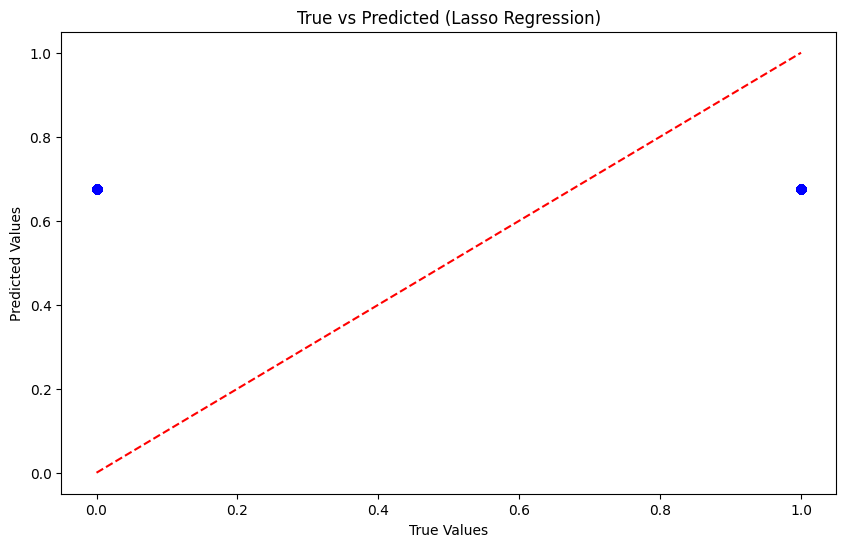

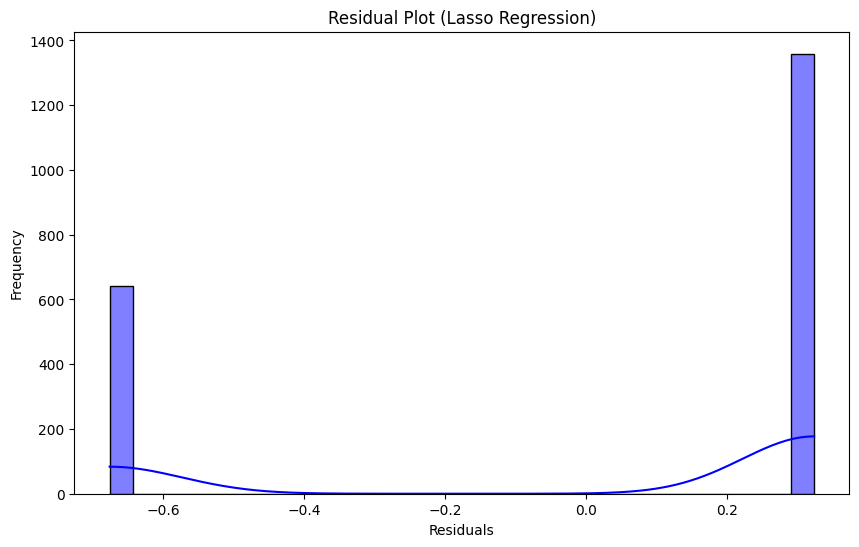

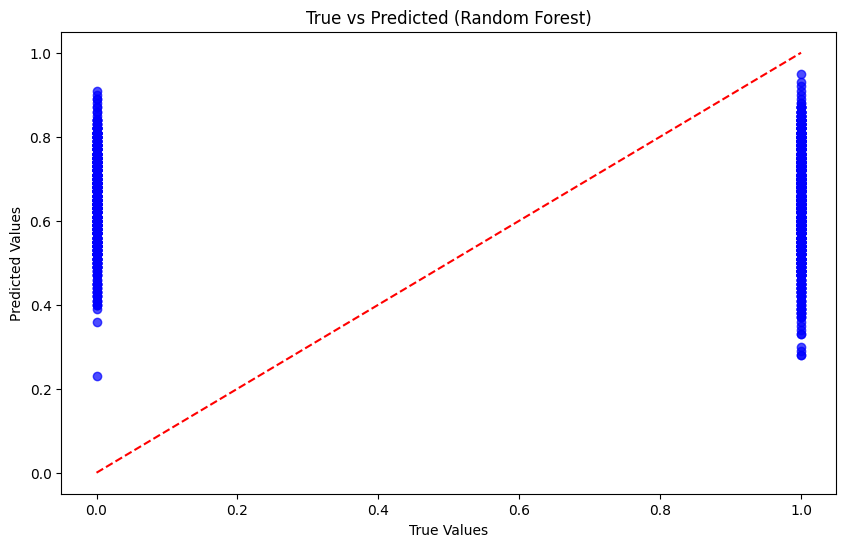

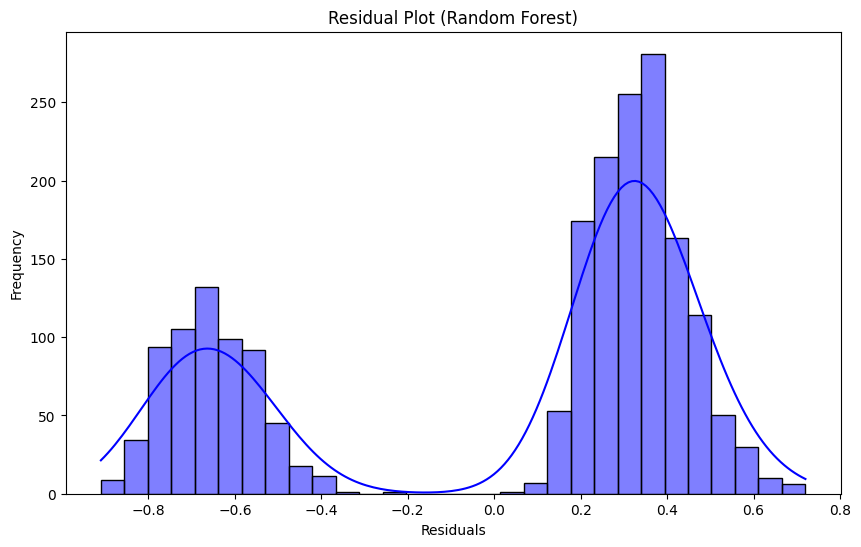

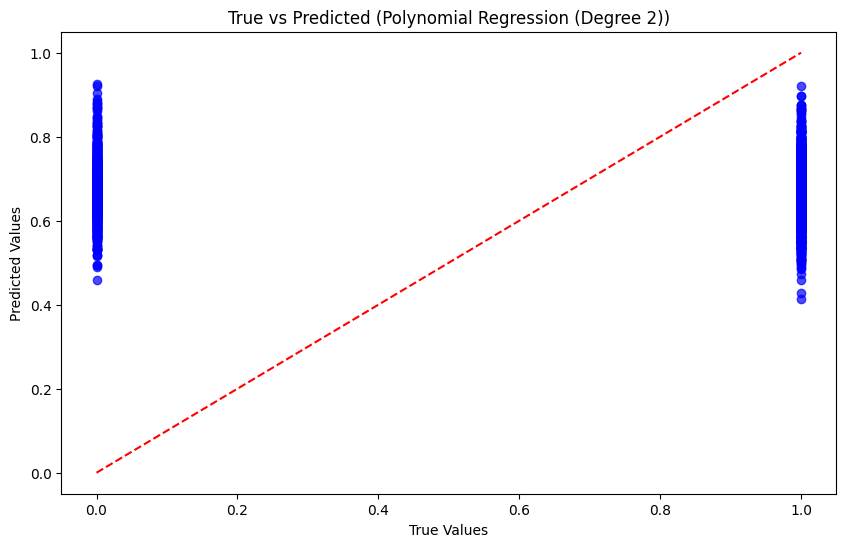

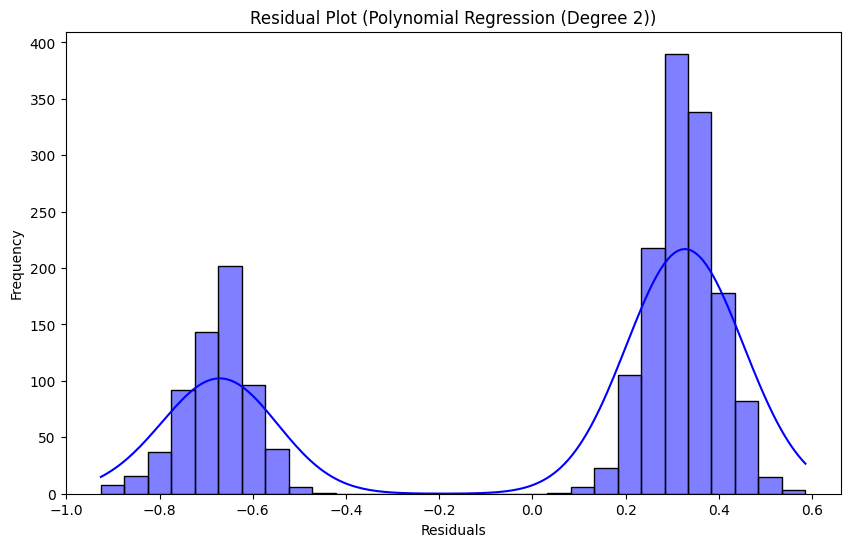

Linear Regression:
  Mean Squared Error: 0.2187
  Root Mean Squared Error: 0.4676
  R-squared: -0.0041
----------------------------------------
Ridge Regression:
  Mean Squared Error: 0.2187
  Root Mean Squared Error: 0.4676
  R-squared: -0.0041
----------------------------------------
Lasso Regression:
  Mean Squared Error: 0.2178
  Root Mean Squared Error: 0.4667
  R-squared: -0.0000
----------------------------------------
Random Forest:
  Mean Squared Error: 0.2260
  Root Mean Squared Error: 0.4754
  R-squared: -0.0378
----------------------------------------
Polynomial Regression (Degree 2):
  Mean Squared Error: 0.2245
  Root Mean Squared Error: 0.4738
  R-squared: -0.0307
----------------------------------------


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset
data = pd.read_csv('synthetic_covid_impact_on_work.csv')

# Check columns and dataset info
print(data.columns)
print(data.info())

# Define the target column
target_column = 'Increased_Work_Hours'

# Ensure the target column exists
if target_column not in data.columns:
    raise KeyError(f"Target column '{target_column}' not found in the dataset")

# Data Preprocessing
processed_df = data.dropna()  # Drop rows with missing values
X = processed_df.drop(columns=[target_column])
y = processed_df[target_column]

# Check for categorical columns to one-hot encode
categorical_cols = X.select_dtypes(include=['object']).columns
print(f"Categorical columns to encode: {categorical_cols}")

# Encode categorical variables (if any) and scale features
X = pd.get_dummies(X, drop_first=True)

# Check data after encoding
print(X.head())

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Polynomial Regression (Degree 2)": Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('linear_regression', LinearRegression())
    ])
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "RMSE": rmse, "R2": r2}
    
    # Plot true vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title(f'True vs Predicted ({name})')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

    # Plot residuals (True - Predicted)
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='blue', bins=30)
    plt.title(f'Residual Plot ({name})')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

# Display results for each model
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {metrics['MSE']:.4f}")
    print(f"  Root Mean Squared Error: {metrics['RMSE']:.4f}")
    print(f"  R-squared: {metrics['R2']:.4f}")
    print("-" * 40)


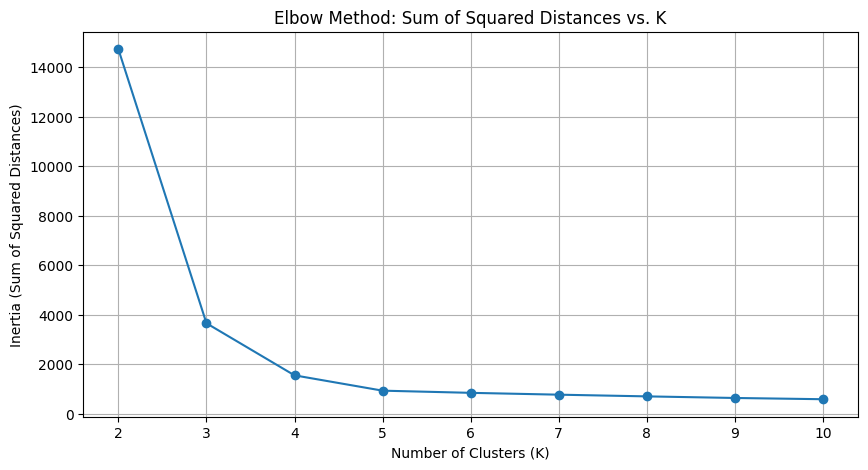

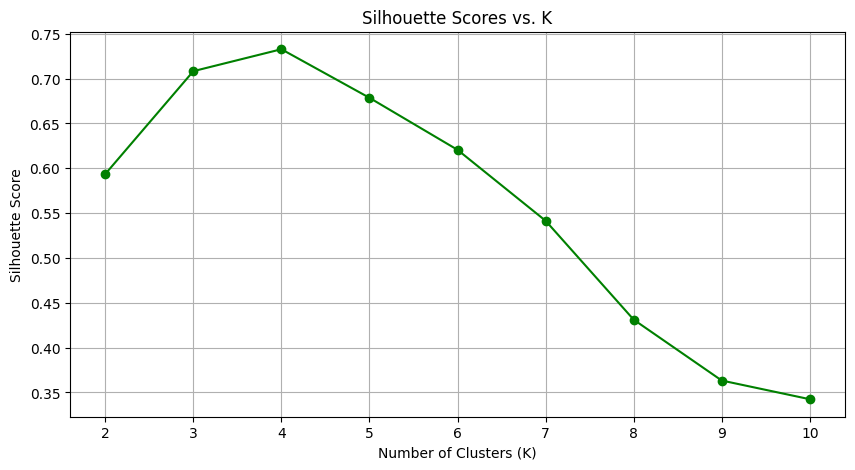

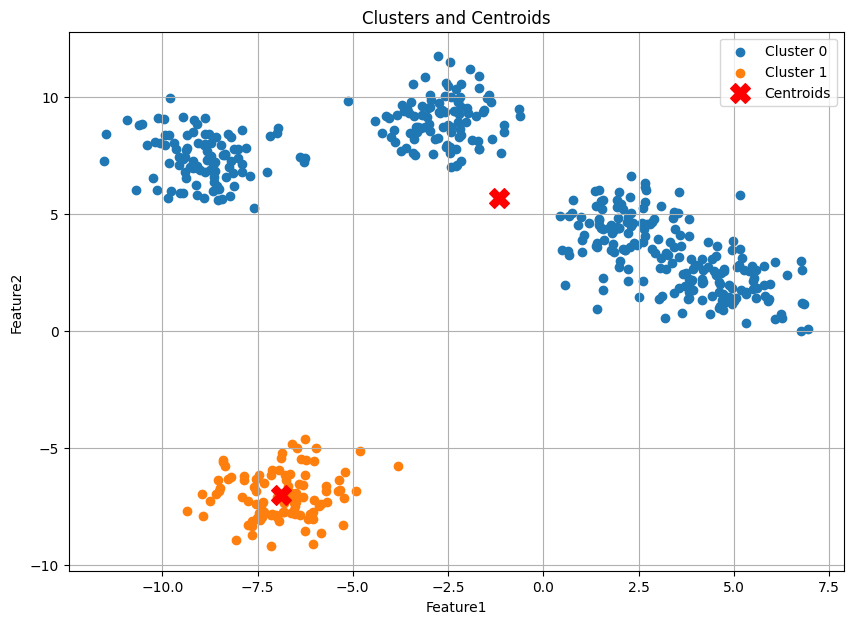

In [19]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs

# Step 1: Create or Load the Dataset
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])

# Step 2: Determine the Optimal Number of Clusters (K) using the Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method: Sum of Squared Distances vs. K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid()
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Scores vs. K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

# Step 3: Apply K-means Clustering with the Optimal K
optimal_k = 2
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans_final.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    clustered_data = df[df["Cluster"] == cluster]
    plt.scatter(clustered_data["Feature1"], clustered_data["Feature2"], label=f"Cluster {cluster}")
plt.scatter(
    kmeans_final.cluster_centers_[:, 0],
    kmeans_final.cluster_centers_[:, 1],
    s=200,
    c='red',
    label="Centroids",
    marker='X'
)
plt.title("Clusters and Centroids")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.legend()
plt.grid()
plt.show()


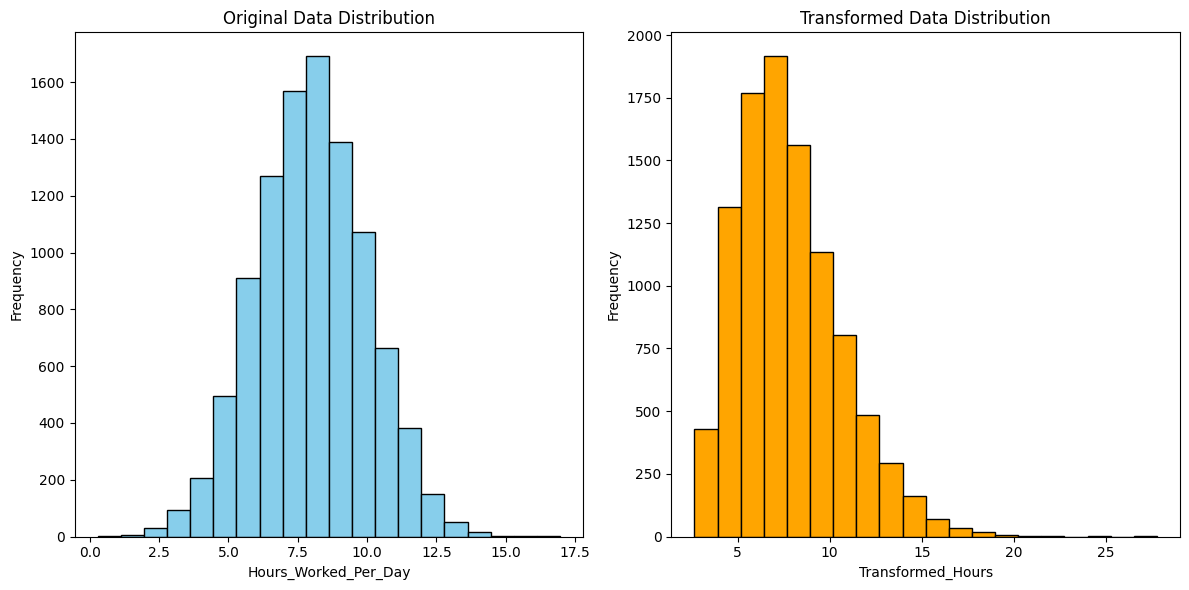

Best Parameters: {'a': np.float64(0.1), 'b': np.float64(-0.22222222222222232), 'c': np.float64(2.7777777777777786)}


,Hours_Worked_Per_Day,Transformed_Hours
0,6.392394,5.443516
1,9.171984,9.152087
2,10.612561,11.682076
3,5.546169,4.621295
4,11.424615,13.291158


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = 'synthetic_covid_impact_on_work.csv'
data = pd.read_csv(file_path)

# Define the hypermetric parabola transformation function
def hypermetric_parabola(x, a=1, b=0, c=0):
    return a * x**2 + b * x + c

# Hyperparameter tuning function
def tune_hyperparameters(column, param_grid):
    X = column.values.reshape(-1, 1)  # Reshape for consistency
    y = column  # Assume identity transformation for simplicity

    # Define a custom scorer
    def custom_scorer(params):
        a, b, c = params
        y_pred = hypermetric_parabola(column, a=a, b=b, c=c)
        return -mean_squared_error(column, y_pred)  # Negative MSE for minimization

    best_score = float('-inf')
    best_params = None

    for a in param_grid['a']:
        for b in param_grid['b']:
            for c in param_grid['c']:
                score = custom_scorer((a, b, c))
                if score > best_score:
                    best_score = score
                    best_params = {'a': a, 'b': b, 'c': c}

    return best_params, best_score

# Define the parameter grid
param_grid = {
    'a': np.linspace(0.1, 1, 10),
    'b': np.linspace(-2, 2, 10),
    'c': np.linspace(-5, 5, 10)
}

# Perform hyperparameter tuning
best_params, best_score = tune_hyperparameters(data['Hours_Worked_Per_Day'], param_grid)

# Apply the best parameters to the transformation
data['Transformed_Hours'] = hypermetric_parabola(data['Hours_Worked_Per_Day'], 
                                                  a=best_params['a'], 
                                                  b=best_params['b'], 
                                                  c=best_params['c'])

# Plot the original and transformed data
plt.figure(figsize=(12, 6))

# Original data
plt.subplot(1, 2, 1)
plt.hist(data['Hours_Worked_Per_Day'], bins=20, color='skyblue', edgecolor='black')
plt.title('Original Data Distribution')
plt.xlabel('Hours_Worked_Per_Day')
plt.ylabel('Frequency')

# Transformed data
plt.subplot(1, 2, 2)
plt.hist(data['Transformed_Hours'], bins=20, color='orange', edgecolor='black')
plt.title('Transformed Data Distribution')
plt.xlabel('Transformed_Hours')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Display the best parameters and the first few rows of the dataset
print("Best Parameters:", best_params)
data[['Hours_Worked_Per_Day', 'Transformed_Hours']].head()
